In [3]:
from alice import Alice
from bob import Bob

from partial_key_recovery import attack

import sys
sys.path.append('..')

from metrics import key_recovery_metrics
from qkd import execute_qkd

import matplotlib.pyplot as plt
import pandas as pd

In [9]:
public, private = execute_qkd(Alice, Bob, 16, DEBUG = True)

Key exchange completed, here's the data:
Alice send pairs: {0: '1x,0z', 1: '1x,1z', 2: '1x,0z', 3: '0x,1z', 4: '0x,0z', 5: '0x,1z', 6: '0x,0z', 7: '0x,1z', 8: '0x,0z', 9: '0x,0z', 10: '0x,0z', 11: '1x,1z', 12: '1x,0z', 13: '0x,1z', 14: '1x,1z', 15: '1x,1z'}
Bob send double matchings: [0, 2, 3, 8, 9, 11, 14]
Alice send usable frames: [(0, 3), (0, 11), (0, 14), (2, 3), (2, 11), (2, 14), (3, 11), (3, 14)]
Bob send sifting string: ['10', '11', '11', '10', '11', '11', '01', '01']
Bob send measured string: ['10', '00', '00', '10', '00', '00', '10', '10']
Bob shared key: 0010100010101010
Alice shared key: 0010100010101010


In [13]:
VALID_SS = [
    "00,00",
    "00,11",
    "01,10",
    "01,01",
    "10,01",
    "10,10",
    "11,11"
]

key_recovery_metrics(execute_qkd, Alice, Bob, 16, attack, 2, VALID_SS)

{'double_matchings': [0, 1, 2, 3, 4, 7, 8, 11, 12, 13, 14],
 'bits_recovered': 32,
 'bits': 32,
 '%': 1.0,
 'SS_left': []}

In [ ]:
pairs = 256

VALID_SS = [
    "00,00",
    "00,11",
    "01,10",
    "01,01",
    "10,01",
    "10,10",
    "11,11"
]

try:
    df = pd.read_csv("results.csv")
except:
    file = open("results.csv", "w")
    file.write("double_matchings,bits_recovered,bits,%")
    file.close()
    df = pd.read_csv("results.csv")

while True:
    results = key_recovery_metrics(execute_qkd, Alice, Bob, pairs, attack, 2, VALID_SS, depolarize_probability = 1)
    
    if not results: continue

    df.loc[len(df)] = [ len(results["double_matchings"]), results["bits_recovered"], results["bits"], results["%"] ]
    
    df.to_csv("results.csv", index = False)

Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.


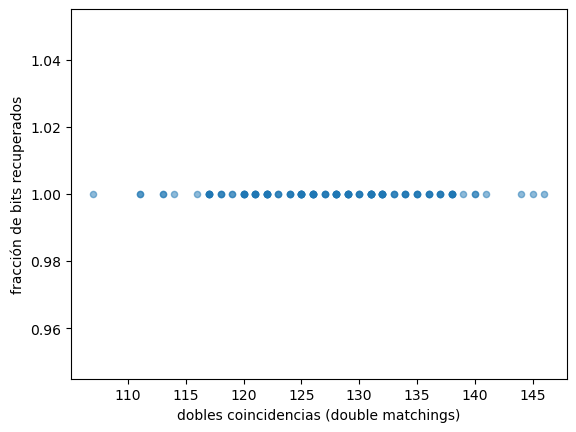

In [4]:
df = pd.read_csv("results.csv")
df.plot.scatter(x = "double_matchings", y = "%", xlabel = "dobles coincidencias (double matchings)", ylabel = "fracción de bits recuperados", alpha = 0.5)

plt.savefig('LL21_results.svg', format = "svg")